In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir_data = 'C:\MJ_Python_codes\ML\Kaggle'
f_app_train = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app_train))
app_train = pd.read_csv(f_app_train)
app_train.shape
app_train.head()

# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#
a = app_train['AMT_ANNUITY'].unique()
b = app_train['CODE_GENDER'].unique()


# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])   
            #print(app_train[col])
print(app_train.shape)
app_train.head()

# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

Path of read in data: C:\MJ_Python_codes\ML\Kaggle\application_train.csv
(307511, 122)


In [2]:
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
plt.hist(app_train['DAYS_EMPLOYED'] / 365,edgecolor = 'k', bins = 10)
plt.xlabel('Days (years)')
plt.ylabel('Count');
plt.show()

ValueError: max must be larger than min in range parameter.

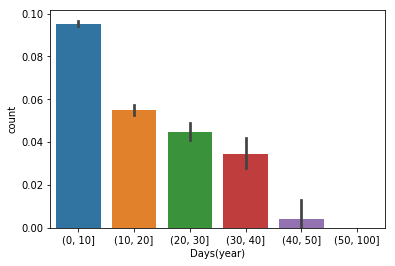

In [3]:
app_train['DAYS_EMPLOYED_grp'] = pd.cut(app_train['DAYS_EMPLOYED']/365,bins= [0,10,20,30,40,50,100])
app_train['DAYS_EMPLOYED_grp'].value_counts()

x = app_train['DAYS_EMPLOYED_grp']
y = app_train['TARGET']

sns.barplot(x, y)
plt.xlabel('Days(year)')
plt.ylabel('count')
plt.show()